# Import Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# listings.csv Pre-processing

In [118]:
listings_df = pd.read_csv("../raw_data/listings.csv")
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20200815122856,2020-08-15,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.91
1,5858,https://www.airbnb.com/rooms/5858,20200815122856,2020-08-15,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.81
2,7918,https://www.airbnb.com/rooms/7918,20200815122856,2020-08-15,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,9.0,9.0,8.0,NaN,f,9,0,9,0,0.14
3,8142,https://www.airbnb.com/rooms/8142,20200815122856,2020-08-15,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,10.0,9.0,9.0,NaN,f,9,0,9,0,0.11
4,8339,https://www.airbnb.com/rooms/8339,20200815122856,2020-08-15,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,10.0,10.0,10.0,STR-0000264,f,2,2,0,0,0.21


## Checking structure and data types

In [119]:
listings_df.shape

(7274, 74)

In [120]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7274 non-null   int64  
 1   listing_url                                   7274 non-null   object 
 2   scrape_id                                     7274 non-null   int64  
 3   last_scraped                                  7274 non-null   object 
 4   name                                          7274 non-null   object 
 5   description                                   7220 non-null   object 
 6   neighborhood_overview                         5330 non-null   object 
 7   picture_url                                   7274 non-null   object 
 8   host_id                                       7274 non-null   int64  
 9   host_url                                      7274 non-null   o

In [121]:
listings_df.infer_objects()
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7274 non-null   int64  
 1   listing_url                                   7274 non-null   object 
 2   scrape_id                                     7274 non-null   int64  
 3   last_scraped                                  7274 non-null   object 
 4   name                                          7274 non-null   object 
 5   description                                   7220 non-null   object 
 6   neighborhood_overview                         5330 non-null   object 
 7   picture_url                                   7274 non-null   object 
 8   host_id                                       7274 non-null   int64  
 9   host_url                                      7274 non-null   o

## Dropping unnecessary columns

In [122]:
listings_df.drop(['listing_url','scrape_id','last_scraped','picture_url','host_url',\
                  'host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed',\
                 'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',\
                 'maximum_maximum_nights','calendar_updated','license',\
                 'calculated_host_listings_count','calculated_host_listings_count_entire_homes',\
                 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'\
                 ],axis=1,inplace=True)
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7274 non-null   int64  
 1   name                         7274 non-null   object 
 2   description                  7220 non-null   object 
 3   neighborhood_overview        5330 non-null   object 
 4   host_id                      7274 non-null   int64  
 5   host_name                    7274 non-null   object 
 6   host_since                   7274 non-null   object 
 7   host_location                7269 non-null   object 
 8   host_about                   5475 non-null   object 
 9   host_response_time           5321 non-null   object 
 10  host_response_rate           5321 non-null   object 
 11  host_acceptance_rate         6393 non-null   object 
 12  host_is_superhost            7274 non-null   object 
 13  host_neighbourhood

## Fixing wrong data types

In [123]:
listings_df.select_dtypes(include=['object']).columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'instant_bookable'],
      dtype='object')

In [124]:
# str -> 'name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about','host_response_time', 
#        'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed',
#       'property_type', 'room_type', 'bathrooms_text'
# datetime -> 'host_since', 'calendar_last_scraped', 'first_review','last_review'
# % (float)-> 'host_response_rate', 'host_acceptance_rate'
# $ (int) -> 'price'
# bool -> 'host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'has_availability', 'instant_bookable'
# list -> 'host_verifications', 'amenities'

# # convert to str
# str_columns = ['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about','host_response_time', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed','property_type', 'room_type', 'bathrooms_text']
# listings_df[str_columns] = listings_df[str_columns].astype(str)

# convert to datetime
listings_df[['host_since', 'calendar_last_scraped', 'first_review','last_review']] =\
listings_df[['host_since', 'calendar_last_scraped', 'first_review','last_review']].apply(pd.to_datetime)

# convert % to float
listings_df['host_response_rate'] =\
listings_df['host_response_rate'].str.replace('%', '').astype(float)/100
listings_df['host_acceptance_rate'] =\
listings_df['host_acceptance_rate'].str.replace('%', '').astype(float)/100

# convert $ to float
listings_df['price']=listings_df['price'].apply(lambda x: x.replace('$', ''))
listings_df['price']=listings_df['price'].apply(lambda x: x.replace(',', '')).astype(float)

# convert to bool
bool_columns = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified', 'has_availability', 'instant_bookable']
for column in bool_columns:
    listings_df[column] = np.where(listings_df[column] == "t", True, False)
                           
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           7274 non-null   int64         
 1   name                         7274 non-null   object        
 2   description                  7220 non-null   object        
 3   neighborhood_overview        5330 non-null   object        
 4   host_id                      7274 non-null   int64         
 5   host_name                    7274 non-null   object        
 6   host_since                   7274 non-null   datetime64[ns]
 7   host_location                7269 non-null   object        
 8   host_about                   5475 non-null   object        
 9   host_response_time           5321 non-null   object        
 10  host_response_rate           5321 non-null   float64       
 11  host_acceptance_rate         6393 non-null 

In [125]:
listings_df[['host_acceptance_rate','price','instant_bookable']].head()

,host_acceptance_rate,price,instant_bookable
0,0.99,132.0,False
1,0.83,235.0,False
2,1.00,56.0,False
3,1.00,56.0,False
4,0.00,750.0,False


## Checking and filling null values

In [126]:
listings_df.isnull().sum()

id                                0
name                              0
description                      54
neighborhood_overview          1944
host_id                           0
host_name                         0
host_since                        0
host_location                     5
host_about                     1799
host_response_time             1953
host_response_rate             1953
host_acceptance_rate            881
host_is_superhost                 0
host_neighbourhood              540
host_listings_count               0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                  1944
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        89
bathrooms_text              

In [127]:
na_columns = ['bathrooms','bedrooms','beds','review_scores_rating',\
            'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',\
            'review_scores_communication','review_scores_location','review_scores_value',\
            'reviews_per_month']
#listings_df[na_columns]=listings_df[na_columns].fillna(0)
for column in na_columns:
    listings_df[column].fillna(0,inplace=True) 

listings_df.isnull().sum()

id                                0
name                              0
description                      54
neighborhood_overview          1944
host_id                           0
host_name                         0
host_since                        0
host_location                     5
host_about                     1799
host_response_time             1953
host_response_rate             1953
host_acceptance_rate            881
host_is_superhost                 0
host_neighbourhood              540
host_listings_count               0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                  1944
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bathrooms_text              

## Importing cleaned data to pickle file

In [128]:
#listings_df.to_pickle('cleaned_listings.pkl')


pickle_listings_df = pd.read_pickle('cleaned_listings.pkl')
pickle_listings_df.head(5)

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family of four that live upstairs. W...,within an hour,...,2020-07-30,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1.91
1,5858,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,...,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,False,0.81
2,7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within a few hours,...,2020-03-06,84.0,7.0,8.0,9.0,9.0,9.0,8.0,False,0.14
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within a few hours,...,2018-09-12,93.0,9.0,9.0,10.0,10.0,9.0,9.0,False,0.11
4,8339,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,24215,Rosy,2009-07-02,"San Francisco, California, United States",I'm an Interior Stylist living in SF. \r\n\r\n...,within a few hours,...,2019-06-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,0.21


## Check for duplicate rows

In [129]:
pickle_listings_df[pickle_listings_df.duplicated()]

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month


# Pre-processing for Price Analysis

## Drop Irrelevant columns

In [130]:
relevant_columns = ["host_response_time","host_response_rate","host_acceptance_rate","host_is_superhost",\
                   "host_listings_count","neighbourhood_cleansed","property_type","room_type",\
                   "accommodates","bathrooms","bedrooms","beds","amenities","price","minimum_nights","maximum_nights",\
                   "number_of_reviews","review_scores_rating","reviews_per_month"]
# print(len(relevant_columns))

for column in pickle_listings_df.columns:
    if column not in relevant_columns:
        pickle_listings_df.drop(column, axis=1,inplace=True)
pickle_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      5321 non-null   object 
 1   host_response_rate      5321 non-null   float64
 2   host_acceptance_rate    6393 non-null   float64
 3   host_is_superhost       7274 non-null   bool   
 4   host_listings_count     7274 non-null   int64  
 5   neighbourhood_cleansed  7274 non-null   object 
 6   property_type           7274 non-null   object 
 7   room_type               7274 non-null   object 
 8   accommodates            7274 non-null   int64  
 9   bathrooms               7274 non-null   float64
 10  bedrooms                7274 non-null   float64
 11  beds                    7274 non-null   float64
 12  amenities               7274 non-null   object 
 13  price                   7274 non-null   float64
 14  minimum_nights          7274 non-null   

## Filling null values

In [131]:
pickle_listings_df.isnull().sum()

host_response_time        1953
host_response_rate        1953
host_acceptance_rate       881
host_is_superhost            0
host_listings_count          0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating         0
reviews_per_month            0
dtype: int64

In [132]:
pickle_listings_df["host_response_time"].fillna("-",inplace=True)
pickle_listings_df["host_response_rate"].fillna(0,inplace=True)
pickle_listings_df["host_acceptance_rate"].fillna(0,inplace=True)
pickle_listings_df.isnull().sum()

host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_listings_count       0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
review_scores_rating      0
reviews_per_month         0
dtype: int64

## Check duplicate rows

In [133]:
duplicate_rows = pickle_listings_df[pickle_listings_df.duplicated()]
print(duplicate_rows)

      host_response_time  host_response_rate  host_acceptance_rate  \
1721                   -                0.00                  0.00   
3448  within a few hours                1.00                  1.00   
3526                   -                0.00                  0.99   
3536                   -                0.00                  0.99   
3538                   -                0.00                  0.99   
...                  ...                 ...                   ...   
7019                   -                0.00                  0.00   
7101      within an hour                0.99                  0.95   
7210      within an hour                1.00                  1.00   
7267      within an hour                1.00                  1.00   
7268      within an hour                1.00                  1.00   

      host_is_superhost  host_listings_count neighbourhood_cleansed  \
1721              False                   68  Downtown/Civic Center   
3448             

In [134]:
pickle_listings_df = pickle_listings_df.drop_duplicates()
pickle_listings_df.duplicated().any()

False

In [135]:
pickle_listings_df['host_is_superhost'] = np.where(pickle_listings_df['host_is_superhost'] == True, 1, 0)
pickle_listings_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,within an hour,1.0,0.99,1,1,Western Addition,Entire apartment,Entire home/apt,3,1.0,1.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",132.0,2,30,257,97.0,1.91
1,within a day,0.6,0.83,0,2,Bernal Heights,Entire apartment,Entire home/apt,5,1.0,2.0,3.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""First a...",235.0,30,60,111,98.0,0.81
2,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,60,19,84.0,0.14
3,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,90,8,93.0,0.11
4,within a few hours,1.0,0.00,0,2,Western Addition,Entire condominium,Entire home/apt,4,1.5,2.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Car...",750.0,5,111,28,97.0,0.21


## Filter out Price Outliers

In [136]:
IQR_value = 633 #based on price box plot from SF EDA notebook -> 3*IQR value
pickleprice_filtered_df = pickle_listings_df[pickle_listings_df.price <= IQR_value]
pickleprice_filtered_df["price"].describe(percentiles=[0.1,0.25, 0.5, 0.75,0.9])

count    6848.000000
mean      166.581157
std       111.840100
min        10.000000
10%        60.000000
25%        88.000000
50%       135.000000
75%       206.000000
90%       315.797000
max       633.000000
Name: price, dtype: float64

## Log Transform 'Price' column

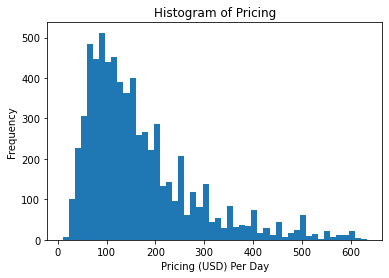

In [137]:
# visualize distribution of price (target variable)
plt.hist(pickleprice_filtered_df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [138]:
# log transform the response 'price'
pickleprice_filtered_df['price_log'] = pickleprice_filtered_df['price'].apply(lambda x: math.log(x))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


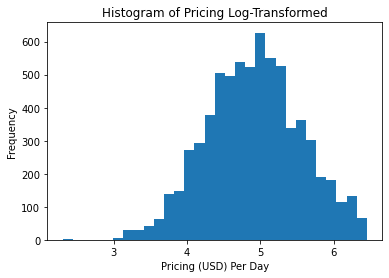

In [139]:
# visualize distribution of price (target variable)
plt.hist(pickleprice_filtered_df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [140]:
pickleprice_filtered_df.to_pickle('cleaned_price_df.pkl')


price_df = pd.read_pickle('cleaned_price_df.pkl')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6848 entries, 0 to 7273
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      6848 non-null   object 
 1   host_response_rate      6848 non-null   float64
 2   host_acceptance_rate    6848 non-null   float64
 3   host_is_superhost       6848 non-null   int32  
 4   host_listings_count     6848 non-null   int64  
 5   neighbourhood_cleansed  6848 non-null   object 
 6   property_type           6848 non-null   object 
 7   room_type               6848 non-null   object 
 8   accommodates            6848 non-null   int64  
 9   bathrooms               6848 non-null   float64
 10  bedrooms                6848 non-null   float64
 11  beds                    6848 non-null   float64
 12  amenities               6848 non-null   object 
 13  price                   6848 non-null   float64
 14  minimum_nights          6848 non-null   

In [141]:
price_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month,price_log
0,within an hour,1.0,0.99,1,1,Western Addition,Entire apartment,Entire home/apt,3,1.0,1.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",132.0,2,30,257,97.0,1.91,4.882802
1,within a day,0.6,0.83,0,2,Bernal Heights,Entire apartment,Entire home/apt,5,1.0,2.0,3.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""First a...",235.0,30,60,111,98.0,0.81,5.459586
2,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,60,19,84.0,0.14,4.025352
3,within a few hours,1.0,1.00,0,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,90,8,93.0,0.11,4.025352
5,within an hour,1.0,0.96,1,2,Mission,Private room in condominium,Private room,3,1.0,1.0,1.0,"[""Heating"", ""Hot water"", ""Children\u2019s book...",169.0,1,14,736,98.0,5.47,5.129899


# calendar.csv Pre-processing

In [120]:
calendar_df = pd.read_csv("../raw_data/calendar.csv")
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,132441,2020-08-16,t,$75.00,$75.00,1.0,10.0
1,25463,2020-08-15,t,$110.00,$110.00,2.0,29.0
2,25463,2020-08-16,t,$110.00,$110.00,2.0,29.0
3,25463,2020-08-17,t,$110.00,$110.00,2.0,29.0
4,25463,2020-08-18,t,$110.00,$110.00,2.0,29.0


## Checking structure and data types

In [121]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655067 entries, 0 to 2655066
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 141.8+ MB


In [122]:
calendar_df.loc[calendar_df['price'] != calendar_df['adjusted_price']]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1729,27025,2020-08-15,f,$165.00,$157.00,30.0,1125.0
1730,27025,2020-08-16,f,$165.00,$157.00,30.0,1125.0
1731,27025,2020-08-17,f,$165.00,$157.00,30.0,1125.0
1732,27025,2020-08-18,f,$165.00,$157.00,30.0,1125.0
1733,27025,2020-08-19,f,$165.00,$157.00,30.0,1125.0
...,...,...,...,...,...,...,...
2648492,44139093,2021-08-10,t,$280.00,$252.00,30.0,1125.0
2648493,44139093,2021-08-11,t,$280.00,$252.00,30.0,1125.0
2648494,44139093,2021-08-12,t,$280.00,$252.00,30.0,1125.0
2648495,44139093,2021-08-13,t,$280.00,$252.00,30.0,1125.0


## Fixing wrong data types

In [123]:
# convert to datetime
calendar_df['date'] =pd.to_datetime(calendar_df['date'])

# convert $ to float
calendar_df[['price','adjusted_price']]=\
calendar_df[['price','adjusted_price']].apply(lambda x: x.str.replace('$', ''))
calendar_df[['price','adjusted_price']].head()
calendar_df[['price','adjusted_price']]=\
calendar_df[['price','adjusted_price']].apply(lambda x: x.str.replace(',', '')).astype(float)

# convert to bool
calendar_df['available'] = np.where(calendar_df['available'] == "t", True, False)
                           
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655067 entries, 0 to 2655066
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 124.1 MB


In [124]:
calendar_df.describe(percentiles=[0.25, 0.5, 0.75],include='all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,2.655067e+06,2655067,2655067,2.655067e+06,2.655067e+06,2.655026e+06,2.655026e+06
unique,NaN,366,2,NaN,NaN,NaN,NaN
top,NaN,2021-03-07 00:00:00,False,NaN,NaN,NaN,NaN
freq,NaN,7274,1427391,NaN,NaN,NaN,NaN
first,NaN,2020-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2.311018e+07,NaN,NaN,2.347354e+02,2.344819e+02,1.378462e+04,5.965051e+06
std,1.416490e+07,NaN,NaN,5.564862e+02,5.562994e+02,1.172417e+06,1.128922e+08
min,9.580000e+02,NaN,NaN,1.000000e+01,1.000000e+01,1.000000e+00,1.000000e+00
25%,1.027357e+07,NaN,NaN,9.100000e+01,9.100000e+01,2.000000e+00,6.000000e+01


In [125]:
calendar_df.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,132441,2020-08-16,True,75.0,75.0,1.0,10.0
1,25463,2020-08-15,True,110.0,110.0,2.0,29.0
2,25463,2020-08-16,True,110.0,110.0,2.0,29.0
3,25463,2020-08-17,True,110.0,110.0,2.0,29.0
4,25463,2020-08-18,True,110.0,110.0,2.0,29.0


In [126]:
print(calendar_df.date.min())

2020-08-15 00:00:00


In [127]:
print(calendar_df.date.max())

2021-08-15 00:00:00


## Checking and filling null values

In [128]:
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price              0
adjusted_price     0
minimum_nights    41
maximum_nights    41
dtype: int64

In [129]:
print(calendar_df.maximum_nights.min())

1.0


In [130]:
calendar_df.fillna(0,inplace=True) 
calendar_df.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

## Importing cleaned data to pickle file

In [131]:
#calendar_df.to_pickle('cleaned_calendar.pkl')


pickle_calendar_df = pd.read_pickle('cleaned_calendar.pkl')
pickle_calendar_df.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,132441,2020-08-16,True,75.0,75.0,1.0,10.0
1,25463,2020-08-15,True,110.0,110.0,2.0,29.0
2,25463,2020-08-16,True,110.0,110.0,2.0,29.0
3,25463,2020-08-17,True,110.0,110.0,2.0,29.0
4,25463,2020-08-18,True,110.0,110.0,2.0,29.0


## Further breakdown to date column for EDA later

In [132]:
calendar_df['dow'] = pd.DatetimeIndex(calendar_df['date']).dayofweek
calendar_df['doy'] = pd.DatetimeIndex(calendar_df['date']).dayofyear
calendar_df['year'] = pd.DatetimeIndex(calendar_df['date']).year
calendar_df['month'] = pd.DatetimeIndex(calendar_df['date']).month
calendar_df['quarter'] = pd.DatetimeIndex(calendar_df['date']).quarter
#calendar_df['hour'] = data.index.hour
calendar_df['weekday'] = pd.DatetimeIndex(calendar_df['date']).day_name()
calendar_df['woy'] = pd.DatetimeIndex(calendar_df['date']).weekofyear
calendar_df['dom'] = pd.DatetimeIndex(calendar_df['date']).day # Day of Month

calendar_df['season'] = calendar_df['month'].apply(lambda month_number: (month_number%12 + 3)//3)

In [133]:
calendar_df.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dow,doy,year,month,quarter,weekday,woy,dom,season
0,132441,2020-08-16,True,75.0,75.0,1.0,10.0,6,229,2020,8,3,Sunday,33,16,3
1,25463,2020-08-15,True,110.0,110.0,2.0,29.0,5,228,2020,8,3,Saturday,33,15,3
2,25463,2020-08-16,True,110.0,110.0,2.0,29.0,6,229,2020,8,3,Sunday,33,16,3
3,25463,2020-08-17,True,110.0,110.0,2.0,29.0,0,230,2020,8,3,Monday,34,17,3
4,25463,2020-08-18,True,110.0,110.0,2.0,29.0,1,231,2020,8,3,Tuesday,34,18,3


## Import to pickle with newly added date breakdown columns

In [134]:
#calendar_df.to_pickle('cleaned_calendar_with_dt.pkl')


pickle_calendar_df_with_dt = pd.read_pickle('cleaned_calendar_with_dt.pkl')
pickle_calendar_df_with_dt.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dow,doy,year,month,quarter,weekday,woy,dom,season
0,132441,2020-08-16,True,75.0,75.0,1.0,10.0,6,229,2020,8,3,Sunday,33,16,3
1,25463,2020-08-15,True,110.0,110.0,2.0,29.0,5,228,2020,8,3,Saturday,33,15,3
2,25463,2020-08-16,True,110.0,110.0,2.0,29.0,6,229,2020,8,3,Sunday,33,16,3
3,25463,2020-08-17,True,110.0,110.0,2.0,29.0,0,230,2020,8,3,Monday,34,17,3
4,25463,2020-08-18,True,110.0,110.0,2.0,29.0,1,231,2020,8,3,Tuesday,34,18,3


## Check for duplicate rows

In [135]:
pickle_calendar_df_with_dt[pickle_calendar_df_with_dt.duplicated()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dow,doy,year,month,quarter,weekday,woy,dom,season


In [136]:
pickle_calendar_df[pickle_calendar_df.duplicated()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
